<a href="https://colab.research.google.com/github/estermartins/Data-Preparation/blob/master/DPaula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Ler dados
iris = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv")
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Selecting Columns **

In [6]:
iris["Name"].head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Name, dtype: object

In [11]:
# Selecionando mais de uma 
iris[["SepalLength", "Name"]].head()

,SepalLength,Name
0,5.1,Iris-setosa
1,4.9,Iris-setosa
2,4.7,Iris-setosa
3,4.6,Iris-setosa
4,5.0,Iris-setosa


In [13]:
iris.drop(columns=["SepalLength", "Name"]).head()

,SepalWidth,PetalLength,PetalWidth
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2


**Filter rows**

In [14]:
# df. loc(linhas, colunas)
iris.loc[:, "Name"].head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Name, dtype: object

In [18]:
# Selecionndo as dez primeiras linhas, dez primeiros casos 
iris.loc[:10, "SepalLength"]

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
Name: SepalLength, dtype: float64

In [16]:
iris.loc[iris["SepalLength"] > 7, ["SepalLength", "Name"]]

,SepalLength,Name
102,7.1,Iris-virginica
105,7.6,Iris-virginica
107,7.3,Iris-virginica
109,7.2,Iris-virginica
117,7.7,Iris-virginica
118,7.7,Iris-virginica
122,7.7,Iris-virginica
125,7.2,Iris-virginica
129,7.2,Iris-virginica
130,7.4,Iris-virginica


In [21]:
m = iris["SepalLength"]. mean()
print (m)
iris.loc[iris["SepalLength"] > m, "SepalLength"]

5.843333333333335


50     7.0
51     6.4
52     6.9
54     6.5
56     6.3
58     6.6
61     5.9
62     6.0
63     6.1
65     6.7
68     6.2
70     5.9
71     6.1
72     6.3
73     6.1
74     6.4
75     6.6
76     6.8
77     6.7
78     6.0
83     6.0
85     6.0
86     6.7
87     6.3
91     6.1
97     6.2
100    6.3
102    7.1
103    6.3
104    6.5
      ... 
118    7.7
119    6.0
120    6.9
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLength, Length: 70, dtype: float64

In [25]:
iris.loc[(iris["SepalLength"] > 6) & (iris["SepalLength"] < 7) , "SepalLength"]

51     6.4
52     6.9
54     6.5
56     6.3
58     6.6
63     6.1
65     6.7
68     6.2
71     6.1
72     6.3
73     6.1
74     6.4
75     6.6
76     6.8
77     6.7
86     6.7
87     6.3
91     6.1
97     6.2
100    6.3
103    6.3
104    6.5
108    6.7
110    6.5
111    6.4
112    6.8
115    6.4
116    6.5
120    6.9
123    6.3
124    6.7
126    6.2
127    6.1
128    6.4
132    6.4
133    6.3
134    6.1
136    6.3
137    6.4
139    6.9
140    6.7
141    6.9
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
Name: SepalLength, dtype: float64

In [26]:
iris.loc[(iris["SepalLength"] > 6) & (iris["SepalLength"] < 7) , "SepalLength"].shape

(48,)

**Creating new variables**

In [27]:
# We are going to create a new variable called 'Size'. Size = Small
# When SepalLength < men and Big when SepalLength >= mean
iris["Size"] = "Small"
iris.loc[iris["SepalLength"] >= iris["SepalLength"].mean(), "Size"] = "Big"
iris["Size"].value_counts()

Small    80
Big      70
Name: Size, dtype: int64

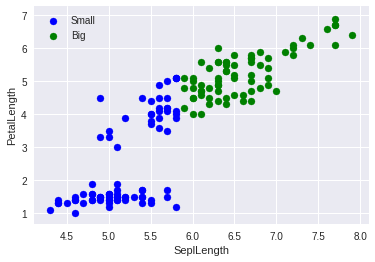

In [37]:
# Plot a graph, showing big and small
fig, ax = plt.subplots()
for i in ["Small", "Big"]: 
  if i == "Small":
    ax.scatter (x=iris.loc[iris["Size"] == i, "SepalLength"],
               y=iris.loc[iris["Size"] == i, "PetalLength"],
                color="blue", label=i
               )
  else: ax.scatter (x=iris.loc[iris["Size"] == i, "SepalLength"],
               y=iris.loc[iris["Size"] == i, "PetalLength"],
                color="green", label=i
               )
ax.legend()
plt.xlabel("SeplLength")
plt.ylabel("PetalLength")
plt.show()